<a href="https://colab.research.google.com/github/CaptaiN785/DL-Notebooks/blob/main/mnist-digit-recognition/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras.datasets as dt

In [2]:
mnist = dt.mnist

In [106]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
## Normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

2


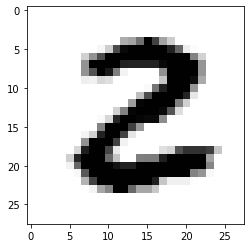

In [6]:
import matplotlib.pyplot as plt
index = 25
print(y_train[index])
plt.imshow(X_train[index], cmap='binary');

In [7]:
## Let's check no of categories are there
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [8]:
## There are total of 10 labels or features
y = y_train.reshape(-1, 1)

In [9]:
## Here data is already inbuilt
## Let's create a model
from tensorflow.keras import layers, models

In [10]:
model = models.Sequential([
                           layers.Flatten(),
                           layers.Dense(64,activation = 'relu'),
                           layers.Dense(128, activation = 'relu'),
                           layers.Dense(10, activation = 'softmax')
])

In [11]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = model.fit(X_train, y, epochs = 30, validation_split=0.2, batch_size = 32)

Epoch 1/30
1500/1500 [==============================] - 12s 5ms/step - loss: 0.2919 - accuracy: 0.9141 - val_loss: 0.1931 - val_accuracy: 0.9430
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1315 - accuracy: 0.9600 - val_loss: 0.1209 - val_accuracy: 0.9622
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0932 - accuracy: 0.9712 - val_loss: 0.1164 - val_accuracy: 0.9652
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0716 - accuracy: 0.9775 - val_loss: 0.1060 - val_accuracy: 0.9678
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0601 - accuracy: 0.9808 - val_loss: 0.1074 - val_accuracy: 0.9683
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0465 - accuracy: 0.9847 - val_loss: 0.0948 - val_accuracy: 0.9737
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0931 - val_accuracy

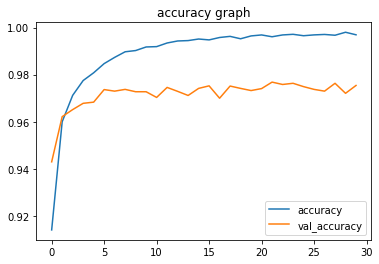

In [13]:
## Printing the accuracy graph and loss graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy graph')
plt.show()

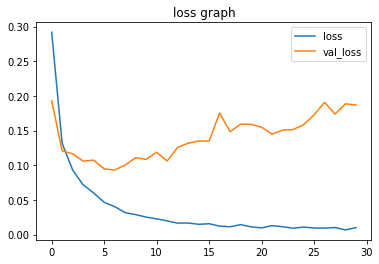

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss graph')
plt.show()

In [15]:
pred = model.predict(X_test)

In [16]:
import numpy as np

def get_index(pred):
    ind = []
    for p in pred:
      pd = 0
      indx = 0
      for i, val in enumerate(p):
          if val > pd:
              pd = val
              indx = i
      ind.append(indx)
    return np.array(ind)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(get_index(pred), y_test))
print(classification_report(get_index(pred), y_test))

0.9764
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       985
           1       0.99      0.99      0.99      1133
           2       0.97      0.98      0.98      1027
           3       0.97      0.98      0.97       998
           4       0.98      0.97      0.98       993
           5       0.96      0.97      0.97       890
           6       0.97      0.98      0.98       955
           7       0.98      0.97      0.98      1041
           8       0.96      0.96      0.96       974
           9       0.97      0.98      0.97      1004

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Trying CNN

In [80]:
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
x_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [82]:
x_train.shape

(60000, 28, 28, 1)

In [105]:
cnn = models.Sequential([
                  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                  layers.MaxPooling2D((2, 2)),
                  layers.Conv2D(64, (3, 3), activation = 'relu'),
                  layers.MaxPooling2D((2, 2)),
                  layers.Flatten(),
                  layers.Dense(64, activation = 'relu'),
                  layers.Dense(10, activation = 'softmax')
])

In [97]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_30 (Dense)            (None, 64)              

In [101]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
loss=SparseCategoricalCrossentropy(from_logits=True)

In [108]:
cnn.compile(optimizer = 'adam', loss = loss, metrics =['accuracy'])

In [110]:
hist = cnn.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0573 - val_accuracy: 0.9839
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0499 - val_accuracy: 0.9852
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9914 - val_loss: 0.0403 - val_accuracy: 0.9893
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0417 - val_accuracy: 0.9885
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0387 - val_accuracy: 0.9898
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0131 - accuracy: 0.9953 - val_loss: 0.0562 - val_accuracy: 0.9864
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0472 - val_accuracy:

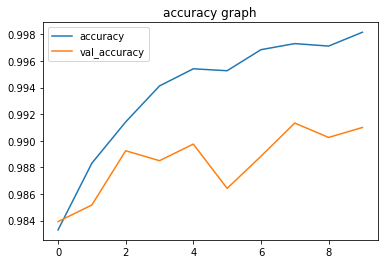

In [112]:
## Printing the accuracy graph and loss graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy graph')
plt.show()

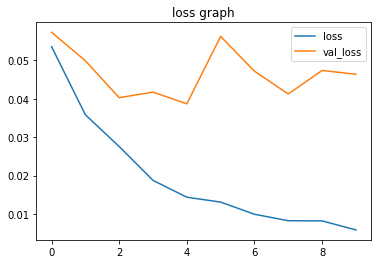

In [113]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss graph')
plt.show()

In [114]:
from sklearn.metrics import accuracy_score, classification_report

pred = cnn.predict(x_test)

print(accuracy_score(get_index(pred), y_test))
print(classification_report(get_index(pred), y_test))

0.9906
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       0.99      0.99      0.99      1137
           2       0.99      1.00      0.99      1022
           3       0.99      0.99      0.99      1009
           4       1.00      0.99      0.99       992
           5       0.99      0.99      0.99       895
           6       0.99      1.00      0.99       950
           7       0.99      0.98      0.99      1042
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1001

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

